/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


      CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1  0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2  0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3  0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4  0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   

          PT           B  LSTAT         MV  
0  15.300000  396.899994   4.98  24.000000  
1  17.799999  396.899994   9.14  21.600000  
2  17.799999  392.829987   4.03  34.700001  
3  18.700001  394.630005   2.94  33.400002  
4  18.700001  396.899994   5.33  36.200001  


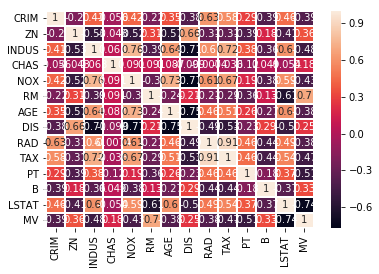

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PT' 'B'
 'LSTAT' 'MV']
         CRIM    ZN  INDUS  CHAS    NOX     RM         AGE     DIS  RAD  TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.199997  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.900002  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.099998  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.799999  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.200001  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.700001  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.599998  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.099998  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.000000  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.900002  6.5921    5  311   
10    0.22489  12.5   7.87     0 

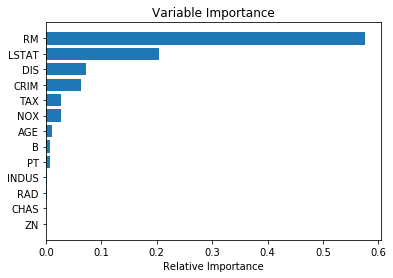

[[-119.81884178   -5.56005228   -3.17269027    5.29159121]
 [-168.89015418   10.11621195  -30.78188796    1.29677685]
 [-169.31170432   14.08054265  -16.75362687  -10.27839986]
 ..., 
 [-138.38716185    0.93809558  -37.28518131    8.07369021]
 [-137.50517725    4.25181097  -35.98834461    7.01643627]
 [-139.19033149    1.00906761  -29.77243458    1.6768616 ]]
k-NN accuracy for test set: 0.990196
             precision    recall  f1-score   support

      False       0.99      1.00      1.00       101
       True       0.00      0.00      0.00         1

avg / total       0.98      0.99      0.99       102

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     8.151
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 20 10:07:41 2017


"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm

df= pd.read_csv('../input/boston.csv')
print(df.head())

corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

X = df.iloc[:,0:13]
Y = df.iloc[:,-1]
names = df.columns.values
print(names)
print(X)
print(Y)
dt=DecisionTreeRegressor()
print(dt.fit(X,Y))

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), names), reverse=True))
# Isolate feature importances 
importance = dt.feature_importances_

sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=4)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(X,Y)

# Inspect shape of the `reduced_data`
reduced_data.shape

# print out the reduced data
print(reduced_data)


#  k-NN 
n_neig = 5 
# Set sc = True if you want to scale your features 
sc = False 


X = df.drop('MV' , 1).values 
 
# Here we scale, if desired 
if sc == True: X = scale(X) 
# Target value
y1 = df['MV'].values 

y = y1 <= 5 
# new target variable: is the rating <= 5? 
# Split the data into a test set and a training set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Train k-NN model and print performance on the test set 
knn = KNeighborsClassifier(n_neighbors = n_neig) 
knn_model = knn.fit(X_train, y_train) 
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test)) 
print(classification_report(y_true, y_pred)) 




class LinearRegression(linear_model.LinearRegression):
    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())







# Any results you write to the current directory are saved as output.